## 零、模型

### 1、公式

### y = b0 + b1X1+B2X2^2 +BnXn^n 

## 2.R平方

### R^2 = 1- 剩余平方和/共平方和    

### R^2为值为0到1，越大拟合效果越好

## 3.广义R平方（增加惩罚作用）

### R^2 = 1- 剩余平方和/共平方和 *（(n-1)/n-p-1）       

### n :数据个数 p:自变量个数

##  一、导入标准库

In [16]:
# Importing the libraries 导入库
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# 使图像能够调整
%matplotlib notebook 
#中文字体显示  
plt.rc('font', family='SimHei', size=8)

## 二、导入数据

In [10]:
# Importing the dataset 导入数据
dataset = pd.read_csv('./Position_Salaries.csv')

X = dataset.iloc[:, 1:2].values  # 职位级别
y = dataset.iloc[:, 2].values    # 薪水
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [11]:
X 

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [12]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

## 三、创建回归模型

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 四、创建多项式回归

In [29]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X) # 自变量不同次数的矩阵
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)
X_poly 

array([[  1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00],
       [  1.00000000e+00,   2.00000000e+00,   4.00000000e+00,
          8.00000000e+00,   1.60000000e+01],
       [  1.00000000e+00,   3.00000000e+00,   9.00000000e+00,
          2.70000000e+01,   8.10000000e+01],
       [  1.00000000e+00,   4.00000000e+00,   1.60000000e+01,
          6.40000000e+01,   2.56000000e+02],
       [  1.00000000e+00,   5.00000000e+00,   2.50000000e+01,
          1.25000000e+02,   6.25000000e+02],
       [  1.00000000e+00,   6.00000000e+00,   3.60000000e+01,
          2.16000000e+02,   1.29600000e+03],
       [  1.00000000e+00,   7.00000000e+00,   4.90000000e+01,
          3.43000000e+02,   2.40100000e+03],
       [  1.00000000e+00,   8.00000000e+00,   6.40000000e+01,
          5.12000000e+02,   4.09600000e+03],
       [  1.00000000e+00,   9.00000000e+00,   8.10000000e+01,
          7.29000000e+02,   6.56100000e+03],
       [  1.00000000e+00,   1.0000000

## 五、画图比较

### 1.线性回归

<IPython.core.display.Javascript object>


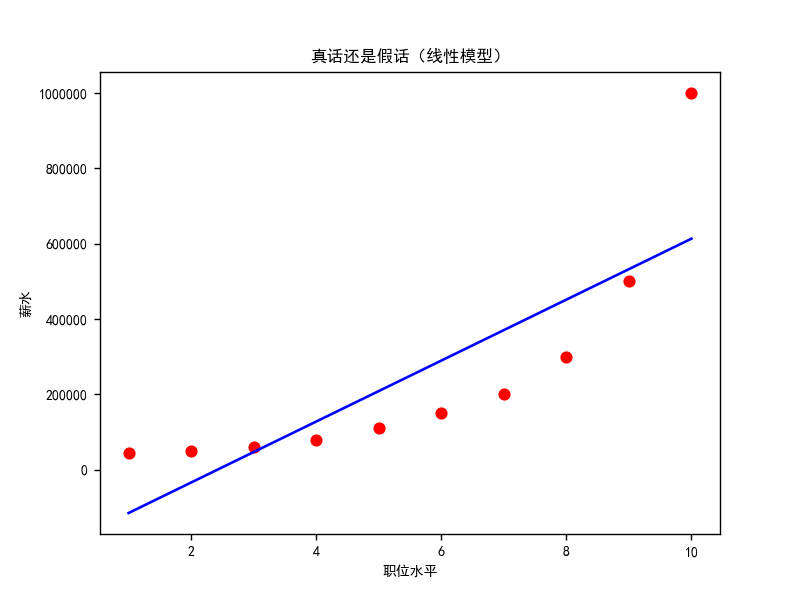

('r-squared', 0.66904123319298947)


In [24]:
plt.scatter(X,y,color="red")
plt.plot(X,lin_reg.predict(X),color ="blue")
plt.title(u"真话还是假话（线性模型）")
plt.xlabel(u"职位水平")
plt.ylabel(u"薪水")
plt.show()
print('r-squared', lin_reg.score(X,y))

### 2.多项式回归

<IPython.core.display.Javascript object>


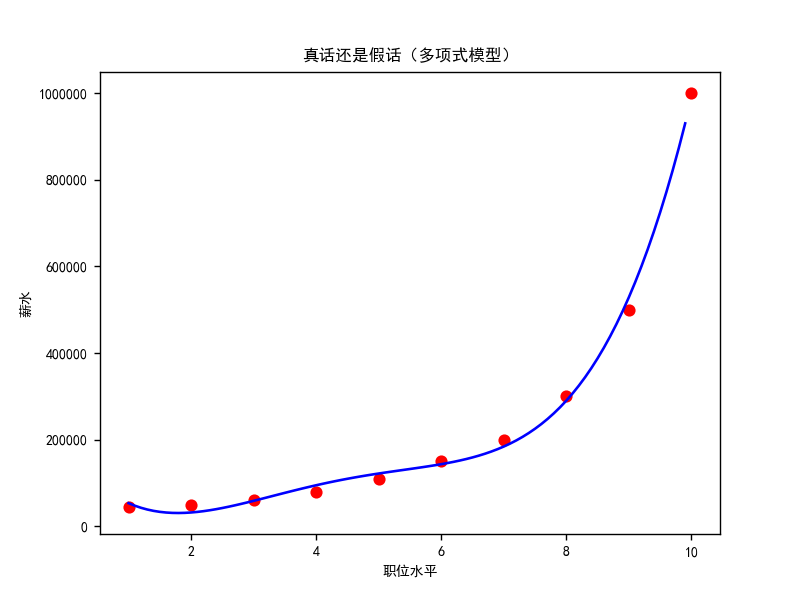

('r-squared', 0.99739228917066114)


In [28]:
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(X,y,color="red")
plt.plot(X_grid,lin_reg_2.predict(poly_reg.fit_transform(X_grid)),color ="blue")
plt.title(u"真话还是假话（多项式模型）")
plt.xlabel(u"职位水平")
plt.ylabel(u"薪水")
plt.show()
print('r-squared', lin_reg_2.score(X_poly,y))

## 结论：多项式回归结果明显优于简单线性回归结果（实际应用时应考虑过拟合的问题）

## 六、薪水预测

## 1.线性回归

In [19]:
lin_reg.predict(6.5)

array([ 330378.78787879])

## 2.多项式回归预测

In [20]:
lin_reg_2.predict(poly_reg.fit_transform(6.5))

array([ 158862.45265154])